## CSCI S-89C Deep Reinforcement Learning, Summer 2020
### Section 4

## Monte Carlo Simulations: Simple (Inefficient) Algorithm

Environment has five states: 1, 2, 3, 4, and 5. Possible transitions are: (1) 1->1, 1->2; (2) 2->1, 2->2, 2->3; (3) 3->2, 3->3, 3->4; (4) 4->3, 4->4, 4->5; (5) 5->4, 5->5.

Actions of the Agent are decoded by -1, 0, and +1, which correspond to its intention to move left, stay, and move right, respectively. The Environment, however, does not always respond to these intentions exactly, and there is 10% chance that action 0 will result in moving to the left (if moving to the left is admissible), and +1 action will result in staying - in other words, there is an "east wind." 

Further, we assume that whenever the process enters state 3, the Environment generates reward = 1. In all other cases the reward is 0. For example, transition 2->3 will result in reward 1, transition 3->3 will result in reward 1, transition 3->2 will result in reward 0, transition 2->2 will result in reward 0, etc.

More specifically, the non-zero transition probabilities $p(s^\prime,r|s,a)$ are<br>

$p(s^\prime=1,r=0|s=1,a=0)=1$,<br>
$p(s^\prime=1,r=0|s=1,a=+1)=0.1,p(s^\prime=2,r=0|s=1,a=+1)=0.9$,<br>

$p(s^\prime=1,r=0|s=2,a=-1)=1$,<br>
$p(s^\prime=1,r=0|s=2,a=0)=0.1,p(s^\prime=2,r=0|s=2,a=0)=0.9$,<br>
$p(s^\prime=2,r=0|s=2,a=+1)=0.1,p(s^\prime=3,r=1|s=2,a=+1)=0.9$,<br>

$p(s^\prime=2,r=0|s=3,a=-1)=1$,<br>
$p(s^\prime=2,r=0|s=3,a=0)=0.1,p(s^\prime=3,r=1|s=3,a=0)=0.9$,<br>
$p(s^\prime=3,r=1|s=3,a=+1)=0.1,p(s^\prime=4,r=0|s=3,a=+1)=0.9$,<br>

etc.

Let’s use $\gamma=0.9$ and $T=100$.

### Policy $\pi$: Try staying in all states 

First, assume the agent chooses to stay in all states, i.e. the policy is
$\pi(-1|1)=0, \pi(0|1)=1, \pi(+1|1)=0$,<br>
$\pi(-1|2)=0, \pi(0|2)=1, \pi(+1|2)=0$,<br>
$\pi(-1|3)=0, \pi(0|3)=1, \pi(+1|3)=0$,<br>
$\pi(-1|4)=0, \pi(0|4)=1, \pi(+1|4)=0$,<br>
etc.

A simple (inefficient) Monte Carlo algorithm is:

In [42]:
import random
from matplotlib import pyplot as plt 
import numpy as np

class Environment:
    def __init__(self, S0 = 1):
        self.time = 0
        self.state = S0

    def admissible_actions(self):
        A = list((-1,0,1))
        if self.state == 1: A.remove(-1)
        if self.state == 5: A.remove(1)
        return A
    
    def check_state(self):
        return self.state

    def get_reward(self, action):
        self.time += 1
        move = action
        if self.state > 1 and move > -1:
            move = np.random.choice([move-1, move],p=[0.1,0.9])
        self.state += move
        if self.state == 3:
            reward = 1
        else:
            reward = 0
        return reward

In [41]:
class Agent:
    def __init__(self):
        self.current_reward = 0.0

    def step(self, env):
        #actions = env.admissible_actions()
        action_selected = 0
        reward = env.get_reward(action_selected)            
        self.current_reward = reward
        
def reward_cumulative(T=10, S0=1, gamma=1):
    env = Environment(S0)
    agent = Agent()
    G = 0
    while env.time < T:
        agent.step(env)
        G += gamma**(env.time-1)*agent.current_reward
    return G

def V_estimate(T=10, S0=1, gamma=0.9, n_trials=10):
    V_estimate = 0
    for i in range(1,n_trials+1):
        #V_estimate = (V_estimate*(i-1) + reward_cumulative(T, S0, gamma))/i
        V_estimate = V_estimate+(reward_cumulative(T, S0, gamma)-V_estimate)/i 
    return V_estimate

T = 100
V = np.array([V_estimate(T, S0 = s, gamma=0.9, n_trials=10000) for s in range(1,6)])

np.set_printoptions(precision=2)
print("state-value function:")
print(V)

state-value function:
[0.   0.   4.76 2.75 1.29]


In [30]:
def V_estimate_hist(T=10, S0=1, gamma=0.9, n_trials=10):
    V_estimate = 0
    V_estimate_hist = []
    for i in range(1,n_trials+1):
        #V_estimate = (V_estimate*(i-1) + reward_cumulative(T, S0, gamma))/i
        V_estimate = V_estimate+(reward_cumulative(T, S0, gamma)-V_estimate)/i
        V_estimate_hist.append(V_estimate)
    return V_estimate_hist

T = 100
V_hist = np.array([V_estimate_hist(T, S0 = s, gamma=0.9, n_trials=1000) for s in range(1,6)])

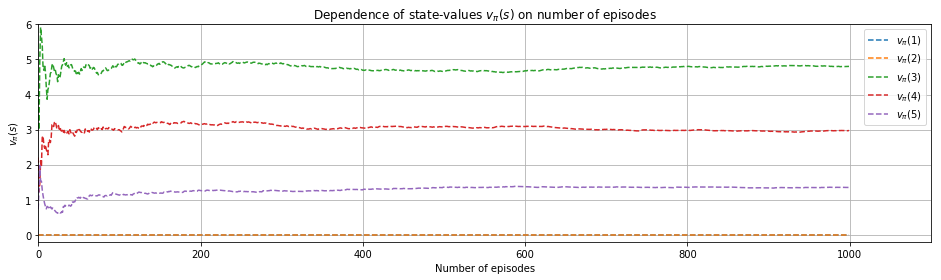

In [38]:
plt.figure(figsize=(16,4))
vplot = plt.plot(np.transpose(V_hist), linestyle='--', marker=None, label="r")
plt.xlabel("Number of episodes")
plt.ylabel("$v_\pi(s)$")
plt.title('Dependence of state-values $v_\pi(s)$ on number of episodes')
plt.ylim(-0.2, 6)
plt.xlim(0,1100)
plt.grid(True)
plt.legend(vplot, ['$v_\pi(1)$', '$v_\pi(2)$','$v_\pi(3)$','$v_\pi(4)$','$v_\pi(5)$'],loc = 'upper right');
plt.show()

### Policy $\pi$: Try moving towards state 3 from all sates 

Next, assume the agent chooses to stay in all states, i.e. the policy is   
$\pi(-1|1)=0, \pi(0|1)=0, \pi(+1|1)=1$,<br>
$\pi(-1|2)=0, \pi(0|2)=0, \pi(+1|2)=1$,<br>
$\pi(-1|3)=0, \pi(0|3)=1, \pi(+1|3)=0$,<br>
$\pi(-1|4)=1, \pi(0|4)=0, \pi(+1|4)=0$,<br>
etc.

A simple (inefficient) Monte Carlo algorithm is:

In [43]:
class Agent:
    def __init__(self):
        self.current_reward = 0.0

    def step(self, env):
        #actions = env.admissible_actions()
        if env.state < 3:
            action_selected = +1
        elif env.state > 3:
            action_selected = -1
        else:
            action_selected = 0
            
        reward = env.get_reward(action_selected)            
        self.current_reward = reward
        
def reward_cumulative(T=10, S0=1, gamma=1):
    env = Environment(S0)
    agent = Agent()
    G = 0
    while env.time < T:
        agent.step(env)
        G += gamma**(env.time-1)*agent.current_reward
    return G

def V_estimate(T=10, S0=1, gamma=0.9, n_trials=10):
    V_estimate = 0
    for i in range(1,n_trials+1):
        #V_estimate = (V_estimate*(i-1) + reward_cumulative(T, S0, gamma))/i
        V_estimate = V_estimate+(reward_cumulative(T, S0, gamma)-V_estimate)/i 
    return V_estimate

T = 100
V = np.array([V_estimate(T, S0 = s, gamma=0.9, n_trials=10000) for s in range(1,6)])

np.set_printoptions(precision=2)
print("state-value function:")
print(V)

state-value function:
[8.1  9.   9.   9.11 8.19]


In [44]:
T = 100
V_hist = np.array([V_estimate_hist(T, S0 = s, gamma=0.9, n_trials=1000) for s in range(1,6)])

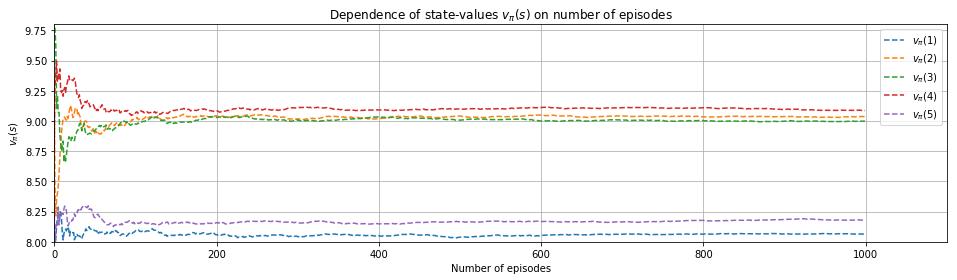

In [50]:
plt.figure(figsize=(16,4))
vplot = plt.plot(np.transpose(V_hist), linestyle='--', marker=None, label="r")
plt.xlabel("Number of episodes")
plt.ylabel("$v_\pi(s)$")
plt.title('Dependence of state-values $v_\pi(s)$ on number of episodes')
plt.ylim(8, 9.8)
plt.xlim(0,1100)
plt.grid(True)
plt.legend(vplot, ['$v_\pi(1)$', '$v_\pi(2)$','$v_\pi(3)$','$v_\pi(4)$','$v_\pi(5)$'],loc = 'upper right');
plt.show()

## Policy Evaluation via Dynamic Programming: Bellman Equation

In [63]:
def policy(action, state):
    policy = (state < 3 and action == 1) + (state > 3 and action == -1) + (state == 3 and action == 0)
    return policy

In [64]:
np.array([[policy(a,s) for a in range(-1,2)] for s in range(1,6)])

array([[0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [123]:
def trans_probs(new_state, reward, state, action):
    move = new_state - state
    prob = 0
    
    if ((reward == 0 and new_state != 3) or (reward == 1 and new_state == 3)):
        if (action == -1 and move == -1):
            prob = 1.0
        elif (action == 0 and move == 0):
            prob = 0.9*(state != 1) + 1.0*(state == 1) 
        elif (action == +1 and move == +1):
            prob = 0.9*(state != 5) + 1.0*(state == 5)
        elif (action == 0 and move == -1):
            prob = 0.1*(state != 1)
        elif (action == +1 and move == 0):
            prob = 0.1*(state != 5)
        
    return prob

In [145]:
gamma = 0.9
theta = 0.0001
V = np.zeros(5)

while True:
    delta = 0
    for state in range(1,6):
        v_curr = V[state-1]
        v_tmp = 0
        for action in range(-1,2):
            for new_state in range(1,6):
                for reward in range(0,2):
                    v_tmp += policy(action,state)*trans_probs(new_state,reward,state,action)*(reward+gamma*V[new_state-1])
        V[state-1] = v_tmp
        delta = max(delta, abs(v_curr - V[state-1]))
    if delta < theta:
        break    

In [149]:
print("state-value function via Dynamic Programming:")
print(V)

state-value function via Dynamic Programming:
[8.01 9.   9.   9.1  8.19]
